In [ ]:
## Online Payments Fraud Detection Dataset Case Study


#### Problem
 Build a Machine Learning model to predict online payment fraud.

In [ ]:
The interpretation of the columns:
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [ ]:
#import revalant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot 
plt.rcParams["figure.figsize"] = (13,13) # to set the default height and width of all plots in this notebook
plt.style.use('ggplot') # to use R's ggplot style for visuals

In [7]:
import pandas as pd

data = pd.read_csv('Online Payment Fraud Detection.csv')

In [8]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [10]:
The data has 10 features and 104k+ observations.
3 of the features are categorical data, 5 features are floats and 2 of the features is a year data type

SyntaxError: invalid syntax (Temp/ipykernel_79552/514332212.py, line 1)

In [11]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
There are no missing values in the data

In [13]:
# Checks for unique values in the isFraud column
data.isFraud.unique()

array([0, 1], dtype=int64)

In [14]:
data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [15]:
# Find row where isFraud = 1
data[data.loc[:,'isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1


In [16]:
#Find row where oldbalanceDest = 42100000
data[data.loc[:,'oldbalanceDest'] == 42100000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
957342,44,CASH_OUT,114496.36,C805835006,466413.59,351917.22,C1854925027,42100000.0,42200000.0,0


In [17]:
{column: len(data[column].unique()) for column in data.columns}

{'step': 95,
 'type': 5,
 'amount': 1009606,
 'nameOrig': 1048317,
 'oldbalanceOrg': 391033,
 'newbalanceOrig': 440792,
 'nameDest': 449635,
 'oldbalanceDest': 590110,
 'newbalanceDest': 437054,
 'isFraud': 2}

In [18]:

#check distribution of values in the isFraud. Use value_counts(normalize=True)
#plot the resulting data
data.isFraud.value_counts(normalize=True)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

<AxesSubplot:ylabel='isFraud'>

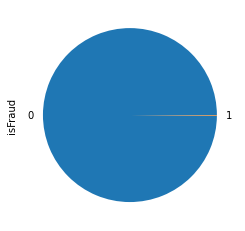

In [19]:
data.isFraud.value_counts(normalize=True).plot.pie()

In [20]:
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [21]:
data.amount.value_counts()

10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: amount, Length: 1009606, dtype: int64

In [ ]:
#Most Used tpye of transaction
sns.countplot(x='type',data=data)

In [ ]:
# What type of transation had the highest amount in value?
data.amount.value_counts().plot.barh()

In [ ]:
plt.figure(figsize=(15,8))
data['amount'].value_counts().plot.bar()